In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [2]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 53kB/s 
     |████████████████████████████████| 450kB 52.0MB/s 
     |████████████████████████████████| 3.8MB 52.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b749ead6190ff9e23a3700e04767782a46b7d5981a732518073638411e43b6bd
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
ERROR: Operation cancelled by user


In [3]:
import tensorflow_datasets as tfds
imdb,info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOAXW4/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOAXW4/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIOAXW4/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences=[]
training_labels=[]

test_sentences= []
test_labels = []

In [0]:
for a,b in train_data:
    training_sentences.append(str(a.numpy()))
    training_labels.append(b.numpy())

for a,b in test_data:
    test_sentences.append(str(a.numpy()))
    test_labels.append(b.numpy())

In [0]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(test_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padding = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [8]:
#METHOD NUMBER 1

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
#METHOD NUMBER 2

"""
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()multipllllll
"""

"\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(6, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\nmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])\nmodel.summary()multipllllll\n"

In [10]:
#METHON NUMBER 3
"""
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
"""

"\nembedding_dim = 64\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),\n    tf.keras.layers.GlobalAveragePooling1D(),\n    tf.keras.layers.Dense(6, activation='relu'),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n\nmodel.summary()\n"

In [12]:
num_epochs= 10

history = model.fit(padding, training_labels_final, epochs= num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 7ms/step - loss: 0.4465 - accuracy: 0.8096 - val_loss: 0.3602 - val_accuracy: 0.8414
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3066 - accuracy: 0.8737 - val_loss: 0.3574 - val_accuracy: 0.8415
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2580 - accuracy: 0.8951 - val_loss: 0.3774 - val_accuracy: 0.8350
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2252 - accuracy: 0.9115 - val_loss: 0.4116 - val_accuracy: 0.8268
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.2013 - accuracy: 0.9239 - val_loss: 0.4458 - val_accuracy: 0.8220
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1828 - accuracy: 0.9320 - val_loss: 0.4996 - val_accuracy: 0.8124
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1652 - accuracy: 0.9405 - val_loss: 0.5308 - val_accuracy: 0.8114
Epoch 

In [13]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(10000, 16)


In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padding[1]))
print(training_sentences[1])

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i 

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

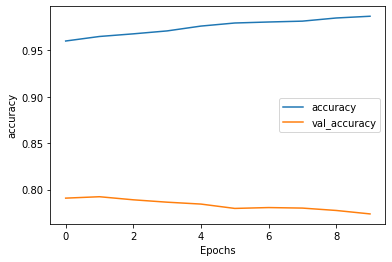

In [0]:
plot_graphs(history, 'accuracy')


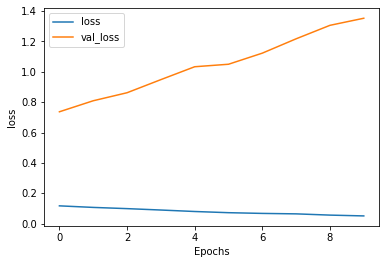

In [0]:

plot_graphs(history, 'loss')